# Negative Sample Rate
This Notebook displays 4 versions of the UMAP figure with different values for `negative sample rate`. The default is 5, and as you increase it, you'll likely get further separation between clusters, but people rarely go >20.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import umap_ as umap
import networkx as nx
import cylouvain
from wavemap_paper.helper_functions import RAND_STATE, set_rand_state

# Load the saved data
SAVED_PATH = r"meanWave_clust_240715_1-Copy1.npy"
data = np.load(SAVED_PATH, allow_pickle=True).item()

# Data preprocessing
normWFs = data['waveforms']
rows_with_1 = np.any(normWFs == 1, axis=1)
normWFs[rows_with_1] *= -1

# Set random state
set_rand_state(RAND_STATE)

C:\Users\short\miniforge3\envs\WaveMAP\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


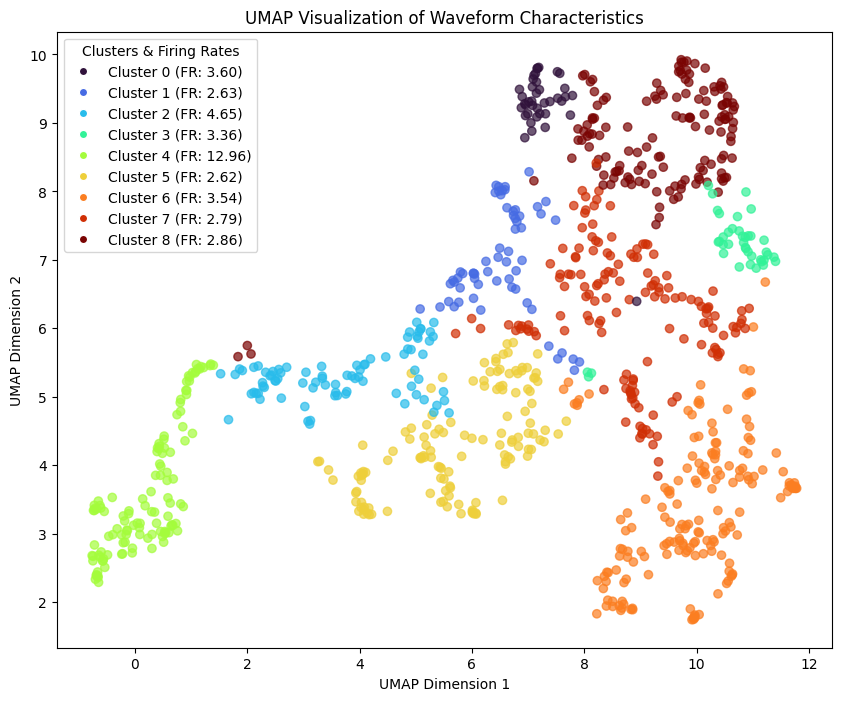

Cluster ID Counts:
Cluster 0: 39 occurrences
Cluster 1: 61 occurrences
Cluster 2: 83 occurrences
Cluster 3: 40 occurrences
Cluster 4: 119 occurrences
Cluster 5: 134 occurrences
Cluster 6: 176 occurrences
Cluster 7: 147 occurrences
Cluster 8: 141 occurrences


In [2]:
# UMAP reduction
reducer = umap.UMAP(random_state=RAND_STATE, n_neighbors=15, negative_sample_rate=5) # Default negative sample rate
embedding = reducer.fit_transform(normWFs)
mapper = reducer.fit(normWFs)

# Network and clustering
G = nx.from_scipy_sparse_array(mapper.graph_)
clustering = cylouvain.best_partition(G, resolution=2)
clustering_solution = list(clustering.values())

# Creating DataFrame for visualization
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution

# Color mapping
cmap = plt.get_cmap("turbo")
colors = cmap(np.linspace(0, 1, len(set(clustering_solution))))
umap_df['cluster_color'] = [colors[i] for i in clustering_solution]

# Group by cluster_id and calculate the mean for the selected columns
columns_to_average = ['x', 'y', 'firing_rate']
umap_df_detail = umap_df.copy()
umap_df_detail['firing_rate'] = data['firing_rates']
umap_df_detail['recording_name'] = data['recording_names']
umap_df_detail['unit_id'] = data['cluster_ids']
cluster_averages = umap_df_detail.groupby('cluster_id')[columns_to_average].mean()
waveform_means = umap_df_detail.groupby('cluster_id')['waveform'].apply(lambda x: np.mean(np.vstack(x), axis=0))
cluster_averages['waveform'] = waveform_means
cluster_colors = umap_df_detail.groupby('cluster_id')['cluster_color'].first()
cluster_averages['cluster_color'] = cluster_colors

# Reset index for visualization
cluster_averages.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['x'], umap_df['y'], marker='o', c=umap_df['cluster_id'], cmap='turbo', alpha=0.7)
plt.title('UMAP Visualization of Waveform Characteristics')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=6) for c in colors]
legend_labels = [f'Cluster {i} (FR: {row["firing_rate"]:.2f})' for i, row in cluster_averages.iterrows()]
plt.legend(handles=legend_handles, labels=legend_labels, title="Clusters & Firing Rates")
plt.show()

# Count the occurrences of each cluster_id
cluster_id_counts = umap_df['cluster_id'].value_counts()

# Sort the index for better readability if it's not in order
cluster_id_counts = cluster_id_counts.sort_index()

# Display the result in a formatted way
print("Cluster ID Counts:")
for cluster_id, count in cluster_id_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


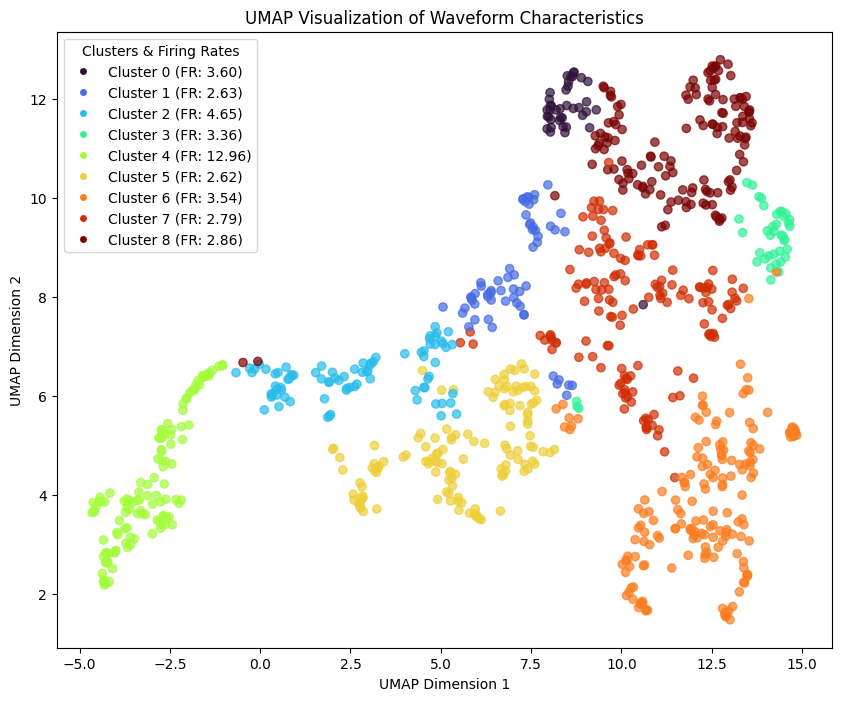

Cluster ID Counts:
Cluster 0: 39 occurrences
Cluster 1: 61 occurrences
Cluster 2: 83 occurrences
Cluster 3: 40 occurrences
Cluster 4: 119 occurrences
Cluster 5: 134 occurrences
Cluster 6: 176 occurrences
Cluster 7: 147 occurrences
Cluster 8: 141 occurrences


In [3]:
# UMAP reduction
reducer = umap.UMAP(random_state=RAND_STATE, n_neighbors=15, negative_sample_rate=10) # Increased negative sample rate to 10
embedding = reducer.fit_transform(normWFs)
mapper = reducer.fit(normWFs)

# Network and clustering
G = nx.from_scipy_sparse_array(mapper.graph_)
clustering = cylouvain.best_partition(G, resolution=2)
clustering_solution = list(clustering.values())

# Creating DataFrame for visualization
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution

# Color mapping
cmap = plt.get_cmap("turbo")
colors = cmap(np.linspace(0, 1, len(set(clustering_solution))))
umap_df['cluster_color'] = [colors[i] for i in clustering_solution]

# Group by cluster_id and calculate the mean for the selected columns
columns_to_average = ['x', 'y', 'firing_rate']
umap_df_detail = umap_df.copy()
umap_df_detail['firing_rate'] = data['firing_rates']
umap_df_detail['recording_name'] = data['recording_names']
umap_df_detail['unit_id'] = data['cluster_ids']
cluster_averages = umap_df_detail.groupby('cluster_id')[columns_to_average].mean()
waveform_means = umap_df_detail.groupby('cluster_id')['waveform'].apply(lambda x: np.mean(np.vstack(x), axis=0))
cluster_averages['waveform'] = waveform_means
cluster_colors = umap_df_detail.groupby('cluster_id')['cluster_color'].first()
cluster_averages['cluster_color'] = cluster_colors

# Reset index for visualization
cluster_averages.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['x'], umap_df['y'], marker='o', c=umap_df['cluster_id'], cmap='turbo', alpha=0.7)
plt.title('UMAP Visualization of Waveform Characteristics')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=6) for c in colors]
legend_labels = [f'Cluster {i} (FR: {row["firing_rate"]:.2f})' for i, row in cluster_averages.iterrows()]
plt.legend(handles=legend_handles, labels=legend_labels, title="Clusters & Firing Rates")
plt.show()

# Count the occurrences of each cluster_id
cluster_id_counts = umap_df['cluster_id'].value_counts()

# Sort the index for better readability if it's not in order
cluster_id_counts = cluster_id_counts.sort_index()

# Display the result in a formatted way
print("Cluster ID Counts:")
for cluster_id, count in cluster_id_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


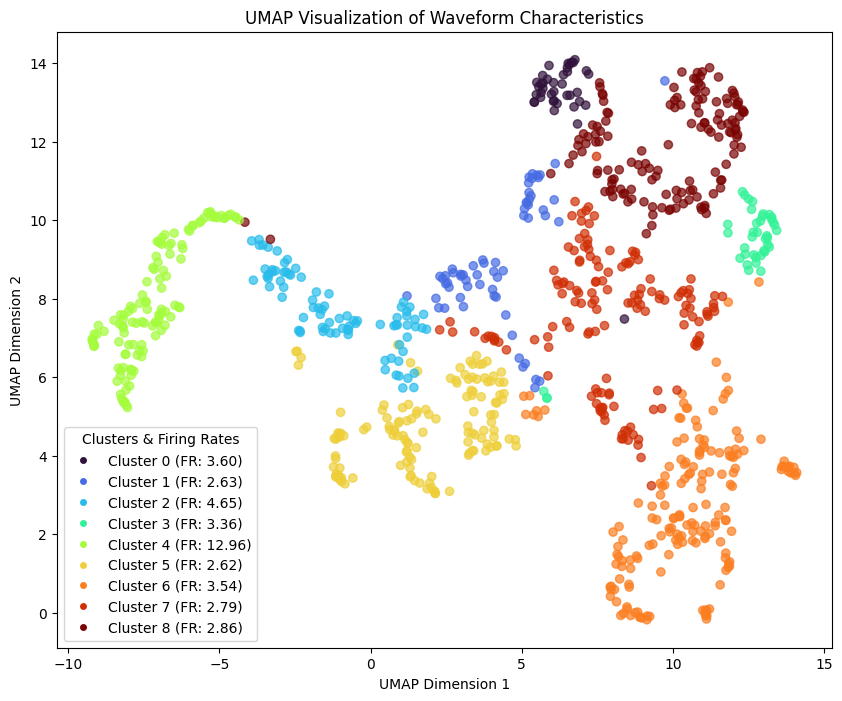

Cluster ID Counts:
Cluster 0: 39 occurrences
Cluster 1: 61 occurrences
Cluster 2: 83 occurrences
Cluster 3: 40 occurrences
Cluster 4: 119 occurrences
Cluster 5: 134 occurrences
Cluster 6: 176 occurrences
Cluster 7: 147 occurrences
Cluster 8: 141 occurrences


In [4]:
# UMAP reduction
reducer = umap.UMAP(random_state=RAND_STATE, n_neighbors=15, negative_sample_rate=15) # Increased negative sample rate to 15
embedding = reducer.fit_transform(normWFs)
mapper = reducer.fit(normWFs)

# Network and clustering
G = nx.from_scipy_sparse_array(mapper.graph_)
clustering = cylouvain.best_partition(G, resolution=2)
clustering_solution = list(clustering.values())

# Creating DataFrame for visualization
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution

# Color mapping
cmap = plt.get_cmap("turbo")
colors = cmap(np.linspace(0, 1, len(set(clustering_solution))))
umap_df['cluster_color'] = [colors[i] for i in clustering_solution]

# Group by cluster_id and calculate the mean for the selected columns
columns_to_average = ['x', 'y', 'firing_rate']
umap_df_detail = umap_df.copy()
umap_df_detail['firing_rate'] = data['firing_rates']
umap_df_detail['recording_name'] = data['recording_names']
umap_df_detail['unit_id'] = data['cluster_ids']
cluster_averages = umap_df_detail.groupby('cluster_id')[columns_to_average].mean()
waveform_means = umap_df_detail.groupby('cluster_id')['waveform'].apply(lambda x: np.mean(np.vstack(x), axis=0))
cluster_averages['waveform'] = waveform_means
cluster_colors = umap_df_detail.groupby('cluster_id')['cluster_color'].first()
cluster_averages['cluster_color'] = cluster_colors

# Reset index for visualization
cluster_averages.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['x'], umap_df['y'], marker='o', c=umap_df['cluster_id'], cmap='turbo', alpha=0.7)
plt.title('UMAP Visualization of Waveform Characteristics')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=6) for c in colors]
legend_labels = [f'Cluster {i} (FR: {row["firing_rate"]:.2f})' for i, row in cluster_averages.iterrows()]
plt.legend(handles=legend_handles, labels=legend_labels, title="Clusters & Firing Rates")
plt.show()

# Count the occurrences of each cluster_id
cluster_id_counts = umap_df['cluster_id'].value_counts()

# Sort the index for better readability if it's not in order
cluster_id_counts = cluster_id_counts.sort_index()

# Display the result in a formatted way
print("Cluster ID Counts:")
for cluster_id, count in cluster_id_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


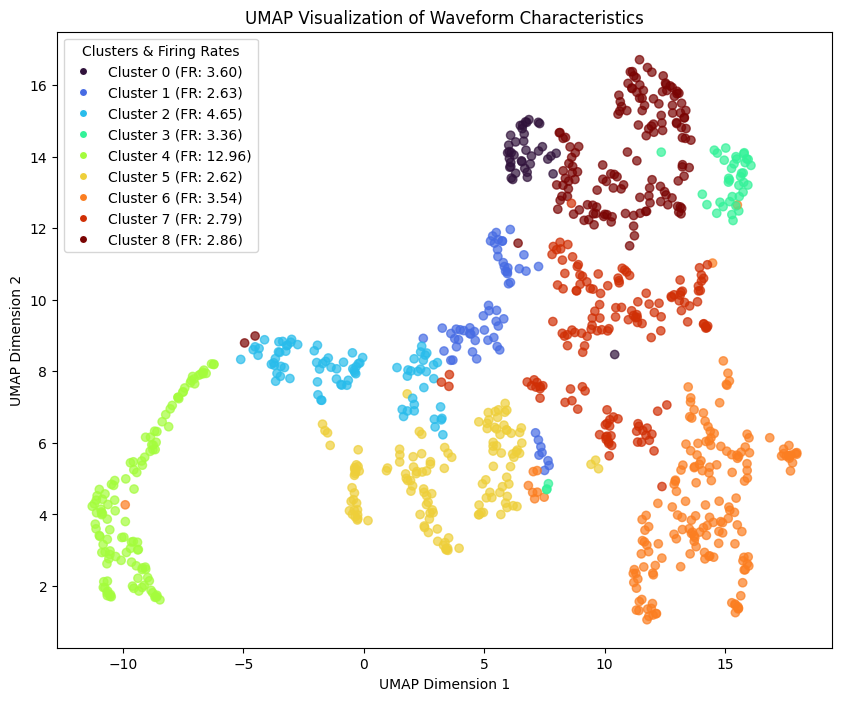

Cluster ID Counts:
Cluster 0: 39 occurrences
Cluster 1: 61 occurrences
Cluster 2: 83 occurrences
Cluster 3: 40 occurrences
Cluster 4: 119 occurrences
Cluster 5: 134 occurrences
Cluster 6: 176 occurrences
Cluster 7: 147 occurrences
Cluster 8: 141 occurrences


In [5]:
# UMAP reduction
reducer = umap.UMAP(random_state=RAND_STATE, n_neighbors=15, negative_sample_rate=20) # Increased negative sample rate to 20
embedding = reducer.fit_transform(normWFs)
mapper = reducer.fit(normWFs)

# Network and clustering
G = nx.from_scipy_sparse_array(mapper.graph_)
clustering = cylouvain.best_partition(G, resolution=2)
clustering_solution = list(clustering.values())

# Creating DataFrame for visualization
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution

# Color mapping
cmap = plt.get_cmap("turbo")
colors = cmap(np.linspace(0, 1, len(set(clustering_solution))))
umap_df['cluster_color'] = [colors[i] for i in clustering_solution]

# Group by cluster_id and calculate the mean for the selected columns
columns_to_average = ['x', 'y', 'firing_rate']
umap_df_detail = umap_df.copy()
umap_df_detail['firing_rate'] = data['firing_rates']
umap_df_detail['recording_name'] = data['recording_names']
umap_df_detail['unit_id'] = data['cluster_ids']
cluster_averages = umap_df_detail.groupby('cluster_id')[columns_to_average].mean()
waveform_means = umap_df_detail.groupby('cluster_id')['waveform'].apply(lambda x: np.mean(np.vstack(x), axis=0))
cluster_averages['waveform'] = waveform_means
cluster_colors = umap_df_detail.groupby('cluster_id')['cluster_color'].first()
cluster_averages['cluster_color'] = cluster_colors

# Reset index for visualization
cluster_averages.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['x'], umap_df['y'], marker='o', c=umap_df['cluster_id'], cmap='turbo', alpha=0.7)
plt.title('UMAP Visualization of Waveform Characteristics')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=6) for c in colors]
legend_labels = [f'Cluster {i} (FR: {row["firing_rate"]:.2f})' for i, row in cluster_averages.iterrows()]
plt.legend(handles=legend_handles, labels=legend_labels, title="Clusters & Firing Rates")
plt.show()

# Count the occurrences of each cluster_id
cluster_id_counts = umap_df['cluster_id'].value_counts()

# Sort the index for better readability if it's not in order
cluster_id_counts = cluster_id_counts.sort_index()

# Display the result in a formatted way
print("Cluster ID Counts:")
for cluster_id, count in cluster_id_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

## Conclusion:
It doesn't affect the actual cluster categorization, just the plotting of those clusters in relation to each other. I think 15 might be the best?